In [1]:
!pip install dipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 4.0.2
    Uninstalling nibabel-4.0.2:
      Successfully uninstalled nibabel-4.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Daniel Bandala @ mar-2023
# dti-model output cleaning script
# general libraries
import os, glob, shutil
import matplotlib.pyplot as plt
# diffussion image processing
from dipy.io.image import load_nifti, save_nifti
from dipy.segment.mask import median_otsu

In [4]:
# folders dataset
main_dir = '/content/drive/MyDrive/dti-transformer/dti_data/INUTR' #ADNI, HCP

In [5]:
case_folder = main_dir+'/case_04'

In [9]:
 # read difussion data
data, affine = load_nifti(case_folder+'/input/DWI_opt.nii.gz')
data.shape

(112, 112, 70, 15)

In [23]:
maskData,mask = median_otsu(data, vol_idx=range(1,15),median_radius=4,numpass=8,dilate=3) #median_radius=2, numpass=1

In [24]:
# read output data
out_data, out_affine = load_nifti(case_folder+'/dti/DTI_FA.nii.gz')
# apply mask to output
clean_output = out_data*mask
#clean_output[...,range(40)] = out_data[...,range(40)]
res = out_data - clean_output

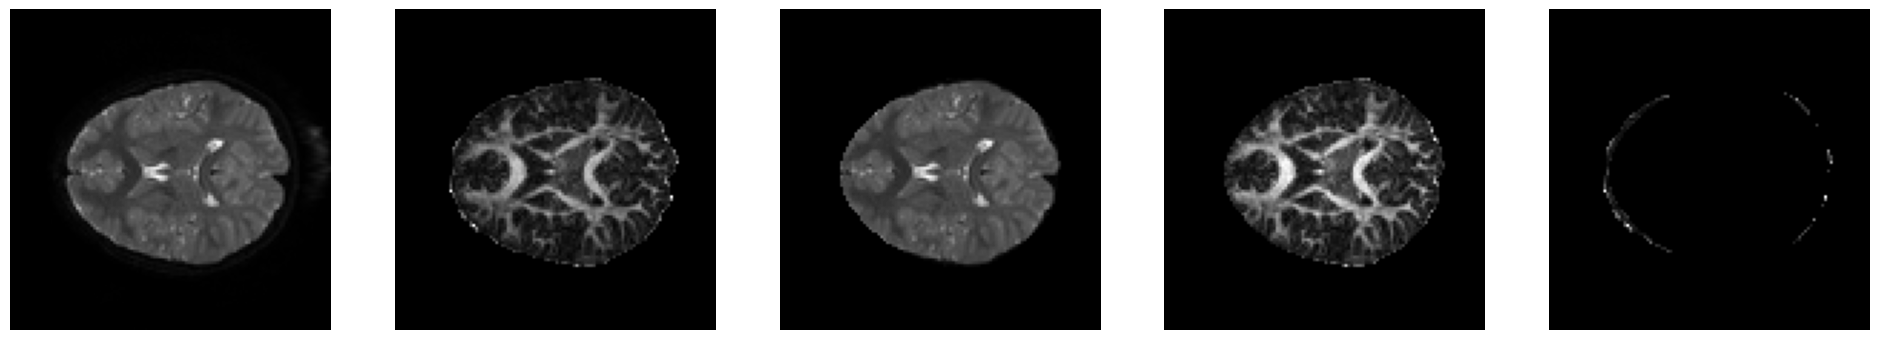

In [25]:
s = 40
plt.figure(figsize=(24,16))
plt.subplot(1, 5, 1).set_axis_off()
plt.imshow(data[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 2).set_axis_off()
plt.imshow(out_data[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 3).set_axis_off()
plt.imshow(maskData[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 4).set_axis_off()
plt.imshow(clean_output[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 5).set_axis_off()
plt.imshow(res[:, :, s], cmap='gray', origin='lower')

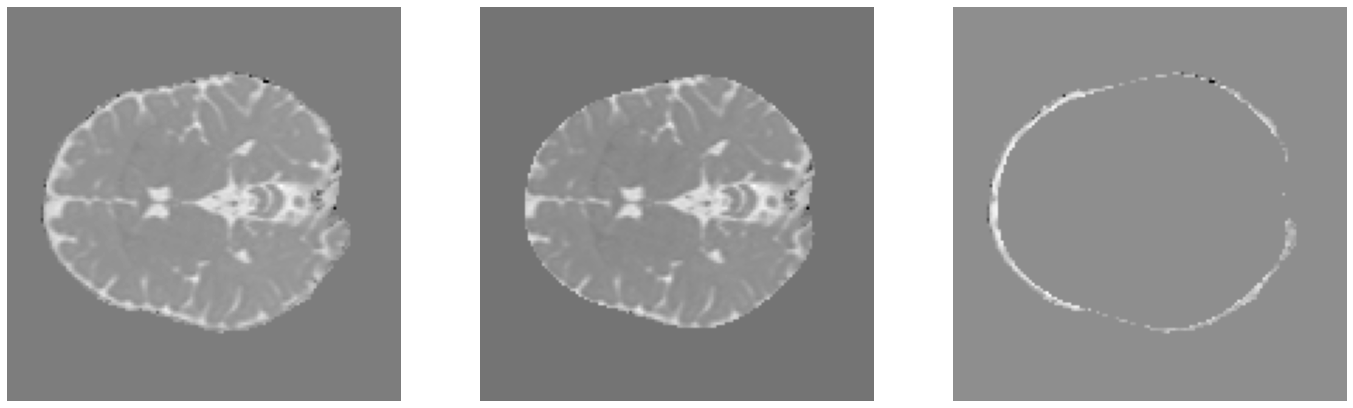

In [ ]:
s = 48
plt.figure(figsize=(24,16))
plt.subplot(1, 3, 1).set_axis_off()
plt.imshow(out_data[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 3, 2).set_axis_off()
plt.imshow(clean_output[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 3, 3).set_axis_off()
plt.imshow(res[:, :, s], cmap='gray', origin='lower')
plt.savefig("outliers_remove.png")

In [6]:
# get cases list
path_list = glob.glob(os.path.join(main_dir,'case_*'))
# for each case extract optimum directions
for path in path_list:
#for path in ['/content/drive/MyDrive/dti-transformer/dti_data/ADNI/case_23']:
    # print case
    print("Processing ", os.path.basename(path))
    #input path
    input = os.path.join(path,'input')
    #output path
    output = os.path.join(path,'dti')
    #target path
    target = os.path.join(path,'output')

    # create folder if it does not exist
    if os.path.exists(target):
        #shutil.rmtree(target)
        continue
    os.makedirs(target)

    # read difussion data
    data, affine = load_nifti(os.path.join(input,'DWI_opt.nii.gz'))
    # generate brain mask
    maskData,mask = median_otsu(data, vol_idx=range(1,15),median_radius=4,numpass=8,dilate=3)

    # clean outliers in all maps
    for map in ["FA","MD"]:
        # read output data
        out_data, out_affine = load_nifti(os.path.join(output,'DTI_'+map+'.nii.gz'))
        # apply mask to output images
        clean_output = out_data*mask
        clean_output[...,range(50)] = out_data[...,range(50)]
        #clean_output[...,range(85,96)] = out_data[...,range(85,96)]
        # save file
        save_nifti(os.path.join(target,'DTI_'+map+'.nii.gz'), clean_output, out_affine)

Processing  case_47
Processing  case_25
Processing  case_56
Processing  case_72
Processing  case_21
Processing  case_63
Processing  case_44
Processing  case_14
Processing  case_01
Processing  case_59
Processing  case_76
Processing  case_52
Processing  case_68
Processing  case_07
Processing  case_58
Processing  case_23
Processing  case_65
Processing  case_55
Processing  case_06
Processing  case_42
Processing  case_75
Processing  case_71
Processing  case_50
Processing  case_78
Processing  case_43
Processing  case_70
Processing  case_73
Processing  case_27
Processing  case_46
Processing  case_09
Processing  case_66
Processing  case_35
Processing  case_19
Processing  case_39
Processing  case_33
Processing  case_15
Processing  case_13
Processing  case_36
Processing  case_26
Processing  case_51
Processing  case_69
Processing  case_03
Processing  case_67
Processing  case_54
Processing  case_48
Processing  case_45
Processing  case_41
Processing  case_74
Processing  case_38
Processing  case_22
